In [ ]:
# Warmup: Review Worksheet Exercises.

In [ ]:
# Warmup: 
# Run this program and think of 2 different kinds of inputs that would crash it.

# Name the Runtime errors that occurred here:
# ...Entering a slice count of 0....divide by 0   ZeroDivisionError
# ...Entering non-numbers                         ValueError
# ...Entering only 1 number or no comma           IndexError

# Then, think of other inputs that will give Semantic Errors
# ...Entering a negative number

import math

def pizza_size(radius):
    # What do we assume is true here?
    return (radius ** 2) * math.pi     # SemanticError

def slice_size(radius, slice_count):
    # What could go wrong here?
    total_size = pizza_size(radius)
    return total_size * (1 / slice_count)  # ZeroDivisionError

# What could go wrong here? 
args = input("Enter pizza diameter(inches), slice count: ")
args = args.split(',')
radius = float(args[0].strip()) / 2 # ValueError
slices = int(args[1].strip())       # IndexError, ValueError

size = slice_size(radius, slices)
print('Each pizza slice will be {} square inches'.format(size))

### Lecture 25: Error Handling

**Learing Objectives:**
    
 - Explain the purpose of assert statements, try/except blocks, and raise statements.

 - Use an assert statement to force a program to crash, and trace code that uses assert.

 - Use try/except blocks to catch runtime errors and deal with them
   - by specifying the exception(s) caught
   - by using the exception object

 - Use the raise statement to raise an exception that may be caught in another part of the program

 - Hand trace code that uses assert, try/except blocks and raise statements

### Being 'Assert'ive
`assert` makes code 'fail fast' rather than continuing with bad data. This is useful because we would prefer to have runtime errors over semantic (thinking) errors.

An `assert` statement takes a boolean condition, e.g. `assert my_list != []` would assert that the list is not empty.

If the assert statement is True, nothing happens. If the assert statement is False, a runtime error occurs.

In [ ]:
age = int(input("Enter your age: "))
assert age >= 0
print("In five years, you will be", age + 5, "years old")

In [ ]:
# You try!
# In pizza_size, assert that the radius is positive.
# In slice_size assert that slice_count is positive.

import math

def pizza_size(radius):
    assert radius > 0
    return (radius ** 2) * math.pi

def slice_size(radius, slice_count):
    assert slice_count >= 1
    total_size = pizza_size(radius)
    return total_size * (1 / slice_count)

args = input("Enter pizza diameter(inches), slice count: ")
args = args.split(',')

radius = float(args[0].strip()) / 2
slices = int(args[1].strip())

size = slice_size(radius, slices)
print('Each pizza slice will be {} square inches'.format(size))

### Use `try`/`except` blocks to "catch" runtime errors
`assert` isn't always the prettiest for the user -- their program crashes!

Often, we prefer to use `try` and `except`. `try` and `except` blocks come in pairs. Python tries to run the code in the `try` block, but if there’s an exception, it jumps to the `except` block -- it does not crash! We call this "catching" the exception. If there is no exception, the `except` block does not run.

In [ ]:
try:  
    print("2 inverse is", 1/2)
    print("1 inverse is", 1/1)
    print("0 inverse is", 1/0)   # this line results in a RuntimeError
    print("-1 inverse is", 1/-1)
    print("-2 inverse is", 1/-2)
except:
    print("Something bad happened :(")
    
print("Just like ifs, we join here!")

In [ ]:
# You try! Catch the error before the program crashes.
# For this example, do NOT use an if statement!
pizza_slices = 8
try:
    num_people = int(input("Enter a number of people to divide the pizza among: "))
    pizza_per_person = pizza_slices / num_people
    print(pizza_per_person, "slices per person.")
except:
    print("We can't divide by 0")

### Being Descriptive
We can be more descriptive by saying `except Exception as e` and printing out information with `e`

In [ ]:
try:  
    print("2 inverse is", 1/2)
    print("1 inverse is", 1/1)
    print("0 inverse is", 1/0)   # this line results in a RuntimeError
    print("-1 inverse is", 1/-1)
    print("-2 inverse is", 1/-2)
except Exception as e:
    print("Something bad happened :(")
    print(type(e))
    print(str(e))

In [ ]:
# Add a try/catch block to handle all errors
# Be descriptive, print out the error type and message.

import math

def pizza_size(radius):
    return (radius ** 2) * math.pi

def slice_size(radius, slice_count):
    total_size = pizza_size(radius)
    return total_size * (1 / slice_count)

while(True):
    args = input("Enter pizza diameter(inches), slice count: ")
    args = args.split(',')

    try:
        radius = float(args[0].strip()) / 2
        slices = int(args[1].strip())
        size = slice_size(radius, slices)
        print('Each pizza slice will be {} square inches'.format(size))
    except Exception as e:
        print("Something went wrong!")
        print(type(e))
        print(str(e))

### Nested Exceptions
Exceptions can be thrown from any function. If that function cannot handle the exception, the exception goes to the calling function. If that function cannot handle the exception, to its calling function. If no calling function can handle the exception, the program crashes.

In [ ]:
def cole():
    print("Cole: Hello! :)")
    cust_happy = input("Cole: Are you having a pleasent shopping experience?")
    assert cust_happy.lower() == 'y'
    print("Cole: Great! :)")
    
def matt():
    print("At Matt's store...")
    cole()
    
def pig_wig_corp():
    while(True):
        print("At the pig wig...")
        matt()
        
pig_wig_corp()

We can choose where to handle an exception, e.g. defer all complaints to corporate.

In [ ]:
def cole():
    print("Cole: Hello! :)")
    cust_happy = input("Cole: Are you having a pleasent shopping experience?")
    assert cust_happy.lower() == 'y'
    print("Cole: Great! :)")
    
def matt():
    print("At Matt's store...")
    cole()
    
def pig_wig_corp():
    while(True):
        print("At the pig wig...")
        try:
            matt()
        except Exception as e:
            print("Corp: We are sorry to hear this.")
            print("Err msg:", str(e))
            print("Err type:", type(e))
        
pig_wig_corp()

... or handle them ourselves ...

In [ ]:
def cole():
    try:
        print("Cole: Hello! :)")
        cust_happy = input("Cole: Are you having a pleasent shopping experience?")
        assert cust_happy.lower() == 'y'
        print("Cole: Great! :)")
    except Exception as e:
        print("Cole: Dang that's rough")
    
def matt():
    print("At Matt's store...")
    cole()
    
def pig_wig_corp():
    while(True):
        print("At the pig wig...")
        try:
            matt()
        except Exception as e:
            print("Corp: We are sorry to hear this.")
            print("Err msg:", str(e))
            print("Err type:", type(e))
pig_wig_corp()

... or somewhere in between!

### `raise` Our Own Errors
Rather than using `assert` we can also `raise` an error. As we can see by `type(e)`, there are different types of errors in Python. These form a hierarchy [(see here)](https://docs.python.org/3/library/exceptions.html). It helps to know some common exceptions, but you don't need to memorize them.

In [ ]:
def cole():
    print("Cole: Hello! :)")
    cust_happy = input("Cole: Are you having a pleasent shopping experience?")
    if cust_happy.lower() != 'y':
        raise FutureWarning("This customer may not return in the future!")
    print("Cole: Great! :)")
    
def matt():
    print("At Matt's store...")
    cole()
    
def pig_wig_corp():
    while(True):
        print("At the pig wig...")
        try:
            matt()
        except Exception as e:
            print("Corp: We are sorry to hear this.")
            print("Err msg:", str(e))
            print("Err type:", type(e))
        
pig_wig_corp()

Let's check if the customer is happy and if they have found everything they needed.
 - If they are not happy, `raise` a `FutureWarning`. Corporate can handle this.
 - If they have not found everything they needed, `raise` a `ResourceWarning`. Matt can handle this.

In [ ]:
def cole():
    print("Cole: Hello! :)")
    cust_happy = input("Cole: Are you having a pleasent shopping experience?")
    if cust_happy.lower() != 'y':
        raise FutureWarning("This customer may not return in the future!")
    cust_found = input("Cole: Did you find everything that you needed?")
    if cust_found.lower() != 'y':
        raise ResourceWarning("We are running out of resources!")
    print("Cole: Great! :)")
    
def matt():
    print("At Matt's store...")
    try:
        cole()
    except Exception as e: # ALMOST correct....
        print("Matt: I'll order some more!")
    
def pig_wig_corp():
    while(True):
        print("At the pig wig...")
        try:
            matt()
        except Exception as e: 
            print("Corp: We are sorry to hear this.")
            print("Err msg:", str(e))
            print("Err type:", type(e))
        
pig_wig_corp()

What's wrong with the above function? Fix it below.

In [ ]:
def cole():
    print("Cole: Hello! :)")
    cust_happy = input("Cole: Are you having a pleasent shopping experience?")
    if cust_happy.lower() != 'y':
        raise FutureWarning("This customer may not return in the future!")
    cust_found = input("Cole: Did you find everything that you needed?")
    if cust_found.lower() != 'y':
        raise ResourceWarning("We are running out of resources!")
    print("Cole: Great! :)")
    
def matt():
    print("At Matt's store...")
    try:
        cole()
    except ResourceWarning as e:
        print("Matt: I'll order some more!")
    
def pig_wig_corp():
    while(True):
        print("At the pig wig...")
        try:
            matt()
        except Exception as e: 
            print("Corp: We are sorry to hear this.")
            print("Err msg:", str(e))
            print("Err type:", type(e))
        
pig_wig_corp()

Let's also ask the customer if they are feeling healthy. If not, we should `raise` a `UserWarning` and Matt should ask them to leave the store.

In [ ]:
def cole():
    print("Cole: Hello! :)")
    cust_happy = input("Cole: Are you having a pleasent shopping experience?")
    if cust_happy.lower() != 'y':
        raise FutureWarning("This customer may not return in the future!")
    cust_found = input("Cole: Did you find everything that you needed?")
    if cust_found.lower() != 'y':
        raise ResourceWarning("We are running out of resources!")
    cust_healthy = input("Cole: Are you feeling healthy today?")
    if cust_healthy.lower() != 'y':
        raise UserWarning("The customer is feeling sick...")
    print("Cole: Great! :)")
    
def matt():
    print("At Matt's store...")
    try:
        cole()
    except ResourceWarning as rw:
        print("Matt: I'll order some more!")
    except UserWarning as uw:
        print("Matt: Please leave the store :(")
    
def pig_wig_corp():
    while(True):
        print("At the pig wig...")
        try:
            matt()
        except Exception as e: 
            print("Corp: We are sorry to hear this.")
            print("Err msg:", str(e))
            print("Err type:", type(e))
        
pig_wig_corp()

In [ ]:
# Consider the code below and answer the following questions...

# In your own words, describe what the code does.
# There is a random chance each one of our "flaky" functions break,
# and we attempt to catch the exceptions as they happen.

# In a single iteration, can a FloatingPointError and OverflowError be thrown?
# No, since these are in the same try/catch block, as soon as there is an exception,
# we will skip to the "except" block. Either one (or neither) may be thrown,
# but not both.

# In a single iteration, can a OSError follow an OverflowError?
# Yes. Although we catch the overflow error if it happens,
# there is a 1% chance an OSError follows. They are not in the
# same try/except block.

# Are there any error(s) we are not catching? If so, name them.
# We are not catching an OSError as it is not inside a try/catch.
# We are also not catching a PermissionError as neither the type
# nor supertype is in the except block.

# Are there any error(s) we are catching but not raising?
# Yes, FileExistsError is not raised by anything.

In [ ]:
import random
import time

def flaky_math_func1():
    if(random.random() < .5):
        raise FloatingPointError("Something went wrong doing some float math!")
        
def flaky_math_func2():
    if(random.random() < .5):
        raise OverflowError("Something went wrong doing some big math!")
        
def flaky_os_func():
    if(random.random() < .01):
        raise OSError("Something went wrong in the OS!")
        
def flaky_impl_func():
    if(random.random() < .05):
        raise NotImplementedError("Something went wrong in the implementation!")
        
def flaky_perm_func():
    if(random.random() < .2):
        raise PermissionError("I don't have permission to do that!")
         
while(True):
    print("Beginning the flaky functions!")
    
    
    try:
        flaky_math_func1()
        flaky_math_func2()
    except ArithmeticError as e:
        print("Phew! I avoided a", type(e))
        
    flaky_os_func()
    
    try:
        flaky_impl_func()
        flaky_perm_func()
    except (RuntimeError, FileExistsError) as e:
        print("Phew! I avoided a", type(e))
    
    print("End of flaky functions!")
    print()
    
    time.sleep(15) # wait 15 seconds, give time to read the output.

### A Word on Hierarchy
All dogs are animals, but not all animals are dogs.

All ZeroDivisionErrors are ArithmeticErrors, but not all ArithmeticErrors are ZeroDivisionErrors.

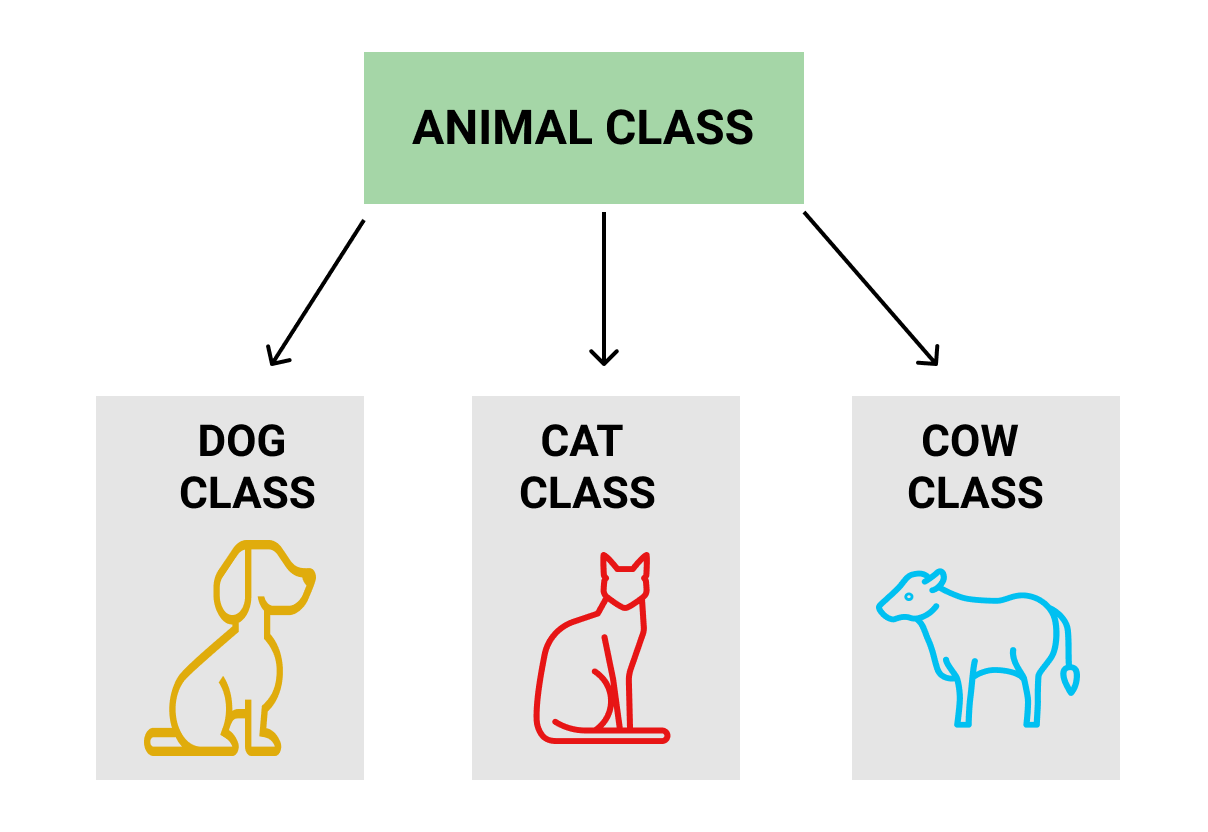

[Source](https://levelup.gitconnected.com/java-classes-and-objects-a312db4bc785) (yes this is a Java resource -- but applicable to MANY programming languages!)